In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
df_fake = pd.read_csv('fake.csv')
df_true = pd.read_csv('true.csv')
print(df_fake.shape)
print('\n')
print(df_true.shape)

(23481, 4)


(21417, 4)


In [8]:
df_fake['label'] = 0
df_true['label'] = 1

In [9]:
df_fake[['text', 'label']].head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
df_true[['text', 'label']].head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [11]:
df = pd.concat([df_fake, df_true])
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,BROTHER OF HERO COACH Breaks Down Over Tribute...,The hero football coach who threw himself betw...,politics,17-Feb-18,0
1,Iraq refuses talks with Kurds unless they comm...,BAGHDAD (Reuters) - The Iraqi government said ...,worldnews,"October 12, 2017",1
2,"Singapore names first woman president, raising...",SINGAPORE (Reuters) - Singapore named a former...,worldnews,"September 13, 2017",1
3,NSA Contractor Arrested For Leaking Classifie...,"Reality Leigh Winner, 25, a federal contractor...",News,"June 6, 2017",0
4,"PLANE FORCED TO TURN AROUND, Police Remove NAA...",NAACP President becomes victim in 5 4 3 2 1 No...,left-news,"Apr 18, 2016",0


In [12]:
df.shape

(44898, 5)

In [13]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
true_subject_news = df[df['label'] == 1][['subject', 'label']]
fake_subject_news = df[df['label'] == 0][['subject', 'label']]

print('true news subject: \n',true_subject_news.subject.value_counts())
print()
print('fake news subject: \n',fake_subject_news.subject.value_counts())

true news subject: 
 subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

fake news subject: 
 subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


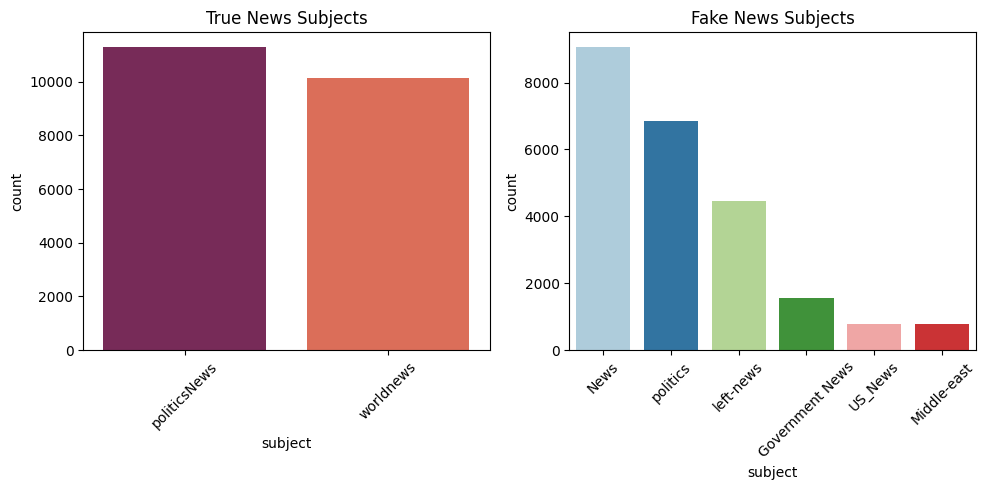

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

true_subject_counts = true_subject_news['subject'].value_counts()
fake_subject_counts = fake_subject_news['subject'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(data=true_subject_counts, palette='rocket', ax=ax[0])
ax[0].set_title('True News Subjects')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(data=fake_subject_counts, palette='Paired', ax=ax[1])
ax[1].set_title('Fake News Subjects')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

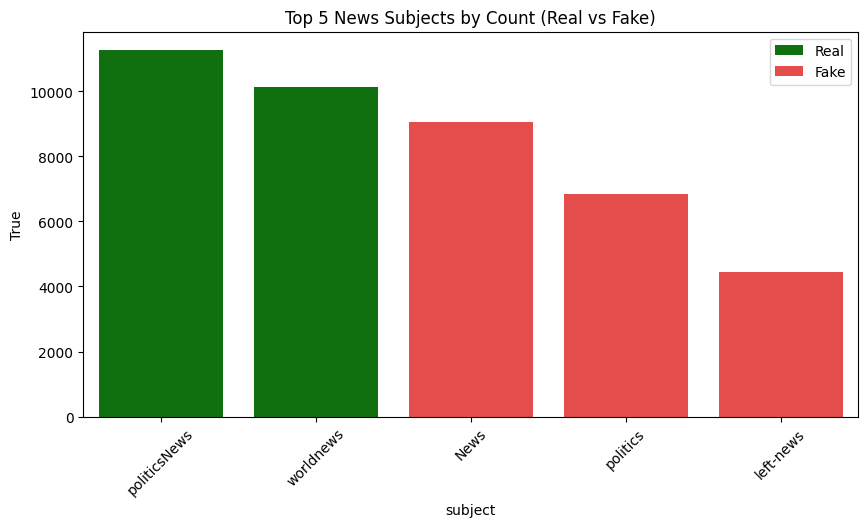

In [16]:
true_subject_counts = true_subject_news['subject'].value_counts()
fake_subject_counts = fake_subject_news['subject'].value_counts()

combined_counts = pd.concat([true_subject_counts, fake_subject_counts], axis=1, keys=['True', 'Fake']).fillna(0)

top5 = combined_counts.sum(axis=1).nlargest(5).index
top5_combined_counts = combined_counts.loc[top5]

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=top5_combined_counts.index, y=top5_combined_counts['True'], color='green', label='Real', ax=ax)
sns.barplot(x=top5_combined_counts.index, y=top5_combined_counts['Fake'], color='red', label='Fake', ax=ax, alpha=0.8)
ax.legend()

plt.xticks(rotation=45)
plt.title('Top 5 News Subjects by Count (Real vs Fake)')
plt.show()

In [17]:
df.label.value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [18]:
def preprocess_and_vectorize(text):
  doc = nlp(text)

  filtered_token = []
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    filtered_token.append(token.text)

  return ' '.join(filtered_token)

In [19]:
df['text_preprocess'] = df['text'].apply(lambda x: preprocess_and_vectorize(x))
df.head()

,title,text,subject,date,label,text_preprocess
0,BROTHER OF HERO COACH Breaks Down Over Tribute...,The hero football coach who threw himself betw...,politics,17-Feb-18,0,hero football coach threw students Florida sch...
1,Iraq refuses talks with Kurds unless they comm...,BAGHDAD (Reuters) - The Iraqi government said ...,worldnews,"October 12, 2017",1,BAGHDAD Reuters Iraqi government said Thursday...
2,"Singapore names first woman president, raising...",SINGAPORE (Reuters) - Singapore named a former...,worldnews,"September 13, 2017",1,SINGAPORE Reuters Singapore named speaker parl...
3,NSA Contractor Arrested For Leaking Classifie...,"Reality Leigh Winner, 25, a federal contractor...",News,"June 6, 2017",0,Reality Leigh Winner 25 federal contractor NSA...
4,"PLANE FORCED TO TURN AROUND, Police Remove NAA...",NAACP President becomes victim in 5 4 3 2 1 No...,left-news,"Apr 18, 2016",0,NAACP President victim 5 4 3 2 1 North Carolin...


In [20]:
df2 = df[['text_preprocess', 'label']]

In [21]:
df2['text_preprocess'] = df2['text_preprocess'].str.lower()

In [22]:
df2.text_preprocess[:5]

0    hero football coach threw students florida sch...
1    baghdad reuters iraqi government said thursday...
2    singapore reuters singapore named speaker parl...
3    reality leigh winner 25 federal contractor nsa...
4    naacp president victim 5 4 3 2 1 north carolin...
Name: text_preprocess, dtype: object

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df2.text_preprocess,
    df2.label,
    test_size=0.2,
    random_state=42,
    stratify=df2.label
)

In [24]:
print('shape of X_train: ', X_train.shape)
print('shape of X_test: ', X_test.shape)

shape of X_train:  (35918,)
shape of X_test:  (8980,)


In [25]:
X_train[:5]

29547    fraga spain reuters catalan residents shifting...
14373    ankara reuters turkish lender ziraat bank deni...
34856    numbers 3 million men women backgrounds took s...
3900     new york reuters new jersey governor chris chr...
19083    brussels reuters britain   maintain alignment ...
Name: text_preprocess, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer_Tfidf', TfidfVectorizer()),
    ('MultinomialNB', MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_Tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [27]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4696
           1       0.94      0.93      0.93      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [28]:
X_test[:5]

14683    reuters lawyer campaign manager president dona...
7735     washington reuters u.s. president donald trump...
16839    irony obama s radical treasury secretary s dec...
29389    london reuters brussels hard fought brexit dea...
44895    washington reuters bipartisan group lawmakers ...
Name: text_preprocess, dtype: object

In [29]:
y_test[:5]

14683    1
7735     1
16839    0
29389    1
44895    1
Name: label, dtype: int64

In [30]:
y_pred[:5]

array([1, 1, 0, 1, 1])

In [45]:
def predict_fake_news(news):
    prediction = clf.predict([news])
    return 'Fake' if prediction[0] == 0 else 'Real'

news_text = str(input('Input new text here: '))
prediction = predict_fake_news(news_text)
print('Prediction:', prediction)

Input new text here: WASHINGTON (Reuters) - Legislation to provide $81 billion in new disaster aid for U.S. states, Puerto Rico and the U.S. Virgin Islands was put on hold by the Senate on Thursday amid attacks from both Republicans and Democrats. The Republican-controlled House of Representatives passed the legislation earlier on Thursday to help recovery efforts stemming from hurricanes and wildfires. But the Senate put off a vote until at least January, according to some lawmakers and aides, after Democrats complained Puerto Rico was not getting enough help and some fiscal hawks fretted about the overall cost. 
Prediction: Fake
